In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn

In [ ]:
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', None)

In [72]:
rend_esc = pd.read_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Personal Work\Data Frames\Work\\rend_esc_cleaned.csv').drop('Unnamed: 0', axis=1)     # Cleaned rend_esc

In [9]:
len(rend['Código da Escola'] .unique()) == len(rend['Código da Escola'])    # Cleaned rend_esc

True

In [4]:
rend.shape

(38907, 64)

### Loading Raw Data

In [ ]:
rend_esc = pd.read_csv('/Users/luisr/Desktop/Repository/IBM_courses/Personal Work/Data Frames/Work Copies/Source/rendimento_escolas_2010.csv', sep=';')

In [238]:
rend_esc_copy = rend_esc.copy()

In [239]:
rend_esc = rend_esc_copy

# 1. Data Cleaning

## 1.1 Droping legends

In [240]:
rend_esc.iloc[-6:, :9]

,Ano,Região,UF,Código do Município,Nome do Município,Localização,Rede,Código da Escola,Nome da Escola
38906,2010,Sudeste,SP,3557303.0,ESTIVA GERBI,Urbana,Municipal,35387859.0,REGINALDO FERNANDO DA SILVA EMEB
38907,Fonte: Mec/Inep/Deed.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38908,"Notas: 1) Inclui as taxas de aprovação, r...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38909,2) Inclui as taxas do Ensino F...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38910,"3) ""taxas de rendimento escola...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38911,4) Escolas em Atividade.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [241]:
rend_esc = rend_esc.iloc[:38907]

## 1.2 Type Conversions: Grades Columns

In [242]:
rend_esc.dtypes.head(13)

Ano                                           object
Região                                        object
UF                                            object
Código do Município                          float64
Nome do Município                             object
Localização                                   object
Rede                                          object
Código da Escola                             float64
Nome da Escola                                object
Aprovação no 1º Ano do Ensino Fundamental     object
Aprovação na 1ª série/2º Ano                  object
Aprovação na 2ª série/3º Ano                  object
Aprovação na 3ª série/4º Ano                  object
dtype: object

### Replacements required for float type conversion

Missing values: '--' to 'NAN'

In [243]:
rend_esc = rend_esc.replace('--', np.nan)

 Comas to dots: 

In [244]:
for col in rend_esc.columns[9:]:
        rend_esc[col] = rend_esc[col].str.replace(',', '.')

In [245]:
rend_esc.columns[:12]

Index(['Ano', 'Região', 'UF', 'Código do Município', 'Nome do Município',
       'Localização', 'Rede', 'Código da Escola', 'Nome da Escola',
       'Aprovação no 1º Ano do Ensino Fundamental',
       'Aprovação na 1ª série/2º Ano', 'Aprovação na 2ª série/3º Ano'],
      dtype='object')

### Conversion

In [246]:
rend_esc.iloc[:, 9:] = rend_esc.iloc[:, 9:].astype(float)

In [247]:
rend_esc.dtypes.head(15)

Ano                                           object
Região                                        object
UF                                            object
Código do Município                          float64
Nome do Município                             object
Localização                                   object
Rede                                          object
Código da Escola                             float64
Nome da Escola                                object
Aprovação no 1º Ano do Ensino Fundamental    float64
Aprovação na 1ª série/2º Ano                 float64
Aprovação na 2ª série/3º Ano                 float64
Aprovação na 3ª série/4º Ano                 float64
Aprovaçãona 4ª série/5º Ano                  float64
Aprovação na 5ª série/6º Ano                 float64
dtype: object

## 1.3 Type Conversions: ID Columns

In [248]:
rend_esc.iloc[:, :9].head()

,Ano,Região,UF,Código do Município,Nome do Município,Localização,Rede,Código da Escola,Nome da Escola
0,2010,Sudeste,MG,3100104.0,ABADIA DOS DOURADOS,Rural,Municipal,31200263.0,EM DE PALMITOS
1,2010,Sudeste,MG,3100104.0,ABADIA DOS DOURADOS,Urbana,Estadual,31200271.0,EE PEDRO ALVARES CABRAL
2,2010,Sudeste,MG,3100104.0,ABADIA DOS DOURADOS,Rural,Municipal,31200778.0,EM EDMUNDO ANTONIO PEREIRA
3,2010,Sudeste,MG,3100104.0,ABADIA DOS DOURADOS,Rural,Municipal,31200794.0,EM HEITOR JOSE DE OLIVEIRA
4,2010,Sudeste,MG,3100104.0,ABADIA DOS DOURADOS,Urbana,Municipal,31271870.0,EM LUIZ GARCIA SOBRINHO


In [250]:
cols_to_int = ['Ano', 'Código do Município', 'Código da Escola']
for col in cols_to_int: rend_esc[col] = rend_esc[col].astype(int)

In [251]:
rend_esc.dtypes.head(9)

Ano                     int32
Região                 object
UF                     object
Código do Município     int32
Nome do Município      object
Localização            object
Rede                   object
Código da Escola        int32
Nome da Escola         object
dtype: object

##### New types
1. Integers: Ano, Código do Município, Código da Escola
2. Float: column 10 on

Saving/Loading Clean Data

In [277]:
#rend_esc.to_csv('/Users/luisr/Desktop/Repository/IBM_courses/Personal Work/Data Frames/Work Copies/Work/rend_esc_cleaned.csv')

In [9]:
rend_esc = pd.read_csv('/Users/luisr/Desktop/Repository/IBM_courses/Personal Work/Data Frames/Work/rend_esc_cleaned.csv')

# 2. Exploratory Data Analysis

In [10]:
IDs = ['Região', 'UF', 'Código do Município', 'Localização', 'Rede']

In [11]:
totals = ['Total Aprovação Fundamental', 'Total  Aprovação Médio', 'Total Reprovação Fundamental', 'Total  Reprovação Médio', 'Abandono 1ª a 4ª  Série/1º a 5º Ano',
       'Abandono 5ª a 8ª Série/ 6º ao 9º Ano', 'Total Abandono Fundamental', 'Total  Abandono Médio Não Seriado', 'Total Abandono - Médio']

In [13]:
totals1 = ['Total Aprovação Fundamental', 'Total  Aprovação Médio', 'Total Reprovação Fundamental', 'Total  Reprovação Médio', 'Total Abandono Fundamental',  'Total Abandono - Médio']

## 2.1 Descriptive Statistics Summary

### Counting IDs

In [262]:
rend_esc[IDs[0]].value_counts()

Sudeste    38907
Name: Região, dtype: int64

Data will be compiled for all regions later on.

In [446]:
UFs = rend_esc[IDs[1]].value_counts()

In [447]:
locs = rend_esc[IDs[3]].value_counts()

In [448]:
redes = rend_esc[IDs[4]].value_counts()

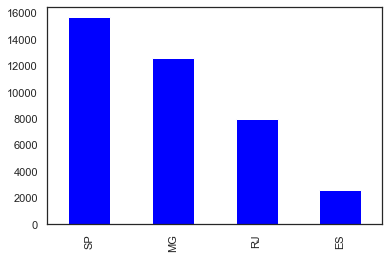

In [451]:
UFs.plot(kind='bar', color='blue')

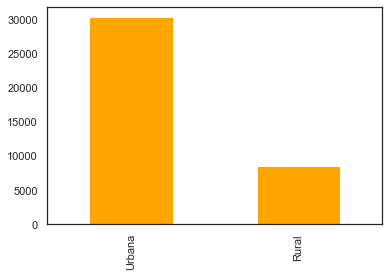

In [457]:
locs.plot(kind='bar', color='orange')

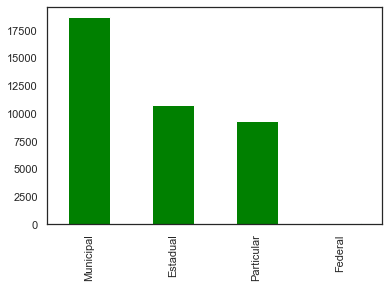

In [459]:
redes.plot(kind='bar', color='green')

### Displaying groups averages

In [31]:
pd.set_option('display.max_colwidth',None)

#### Totals by Federative Unity

In [31]:
rend_esc.groupby(IDs[1]).mean()[totals1]

,Total Aprovação Fundamental,Total Aprovação Médio,Total Reprovação Fundamental,Total Reprovação Médio,Total Abandono Fundamental,Total Abandono - Médio
UF,,,,,,
ES,91.436134,85.095402,7.320728,9.356092,1.243137,5.548506
MG,91.496736,82.663593,6.877973,10.070628,1.625291,7.265779
RJ,84.485654,75.425844,13.399456,15.103265,2.114890,9.470891
SP,95.002670,87.384580,4.339693,9.388368,0.657637,3.227052


#### Totals by Urbanization

In [17]:
rend_esc.groupby(IDs[3]).mean()[totals1]

,Total Aprovação Fundamental,Total Aprovação Médio,Total Reprovação Fundamental,Total Reprovação Médio,Total Abandono Fundamental,Total Abandono - Médio
Localização,,,,,,
Rural,91.053394,87.218162,7.695648,6.447921,1.250958,6.333917
Urbana,91.832881,83.996990,6.863235,10.660777,1.303883,5.342233


#### Totals by Institution Type

In [18]:
rend_esc.groupby(IDs[4]).mean()[totals1]

,Total Aprovação Fundamental,Total Aprovação Médio,Total Reprovação Fundamental,Total Reprovação Médio,Total Abandono Fundamental,Total Abandono - Médio
Rede,,,,,,
Estadual,89.281213,79.179755,8.104653,12.844832,2.614134,7.975412
Federal,89.818182,87.067105,10.118182,11.809211,0.063636,1.123684
Municipal,90.801471,83.070303,8.152407,11.553333,1.046122,5.376364
Particular,96.634601,93.923944,3.137332,5.743585,0.228066,0.332471


#### Totals by City ordered by fundamental level abandonment

In [34]:
rend_esc.groupby(['Nome do Município', IDs[1]], as_index=False).mean()[['Nome do Município', IDs[1]]+totals].sort_values('Abandono 5ª a 8ª Série/ 6º ao 9º Ano', ascending=False).reset_index(drop=True).head(20)

,Nome do Município,UF,Total Aprovação Fundamental,Total Aprovação Médio,Total Reprovação Fundamental,Total Reprovação Médio,Abandono 1ª a 4ª Série/1º a 5º Ano,Abandono 5ª a 8ª Série/ 6º ao 9º Ano,Total Abandono Fundamental,Total Abandono Médio Não Seriado,Total Abandono - Médio
0,CONQUISTA,MG,86.280000,70.000000,7.140000,11.700000,2.925000,21.200000,6.580000,NaN,18.300000
1,PEQUI,MG,93.780000,76.000000,2.480000,5.200000,0.080000,20.500000,3.740000,NaN,18.800000
2,MATIAS CARDOSO,MG,95.513333,89.500000,0.880000,1.833333,1.140000,20.260000,3.606667,NaN,8.666667
3,ITARIRI,SP,92.305556,84.266667,4.244444,10.066667,2.775000,17.416667,3.450000,NaN,5.666667
4,PAVAO,MG,91.066667,79.100000,3.450000,8.300000,0.140000,17.300000,5.483333,NaN,12.600000
5,SAO GERALDO DO BAIXIO,MG,88.375000,100.000000,6.450000,0.000000,1.566667,16.000000,5.175000,NaN,0.000000
6,PIAU,MG,94.166667,84.800000,0.366667,4.000000,0.300000,15.800000,5.466667,NaN,11.200000
7,IRUPI,ES,81.691667,84.100000,15.116667,3.400000,0.958333,15.700000,3.191667,NaN,12.500000
8,CAMPO FLORIDO,MG,89.420000,48.800000,7.200000,27.200000,0.475000,15.000000,3.380000,NaN,24.000000
9,CUPARAQUE,MG,87.133333,81.500000,7.816667,0.000000,0.150000,14.850000,5.050000,NaN,18.500000


#### Totals by City Ordered by high school level abandonment

In [299]:
rend_esc.groupby(['Nome do Município', IDs[1]], as_index=False).mean()[['Nome do Município', IDs[1]]+totals].sort_values('Total Abandono - Médio', ascending=False).reset_index(drop=True).head(20)

,Nome do Município,UF,Total Aprovação Fundamental,Total Aprovação Médio,Total Reprovação Fundamental,Total Reprovação Médio,Abandono 1ª a 4ª Série/1º a 5º Ano,Abandono 5ª a 8ª Série/ 6º ao 9º Ano,Total Abandono Fundamental,Total Abandono Médio Não Seriado,Total Abandono - Médio
0,VERISSIMO,MG,83.633333,53.40,13.633333,6.00,0.000000,8.200000,2.733333,NaN,40.60
1,PERIQUITO,MG,92.060000,68.50,4.440000,0.50,1.240000,5.900000,3.500000,NaN,31.00
2,GUARARA,MG,81.450000,59.60,17.750000,11.20,0.000000,3.900000,0.800000,NaN,29.20
3,REDUTO,MG,85.800000,67.70,10.800000,3.40,2.614286,8.900000,3.400000,NaN,28.90
4,SANTA BARBARA DO MONTE VERDE,MG,83.300000,72.50,13.412500,0.00,2.887500,5.400000,3.287500,NaN,27.50
5,PADRE CARVALHO,MG,95.646154,67.30,2.807692,5.25,0.258333,6.633333,1.546154,NaN,27.45
6,SAO GERALDO,MG,86.933333,58.30,9.600000,15.00,0.400000,12.450000,3.466667,NaN,26.70
7,CORDISLANDIA,MG,92.500000,70.80,5.133333,3.20,0.550000,6.000000,2.366667,NaN,26.00
8,LEANDRO FERREIRA,MG,97.033333,72.30,2.366667,2.20,0.166667,3.600000,0.600000,NaN,25.50
9,JAMPRUCA,MG,82.075000,70.45,12.700000,5.45,1.350000,8.100000,5.225000,NaN,24.10


## 3.2 Correlations Analysis

In [38]:
rend_esc.corr().iloc[:,-1].sort_values(ascending=False, abs=True)

TypeError: sort_values() got an unexpected keyword argument 'abs'

In [47]:
corr.iloc[:, -1].reindex((-corr.iloc[:,-1].abs()).sort_values().index)

Total Abandono - Médio                        1.000000
Abandono na 1ª série - Médio                  0.949405
Abandono na 2ª série - Médio                  0.919256
Abandono na 3ª série - Médio                  0.823489
Total  Aprovação Médio                       -0.700765
Abandono 5ª a 8ª Série/ 6º ao 9º Ano          0.682171
Total Abandono Fundamental                    0.661880
Aprovação na 2ª série - Médio                -0.659859
Aprovação na 1ª série - Médio                -0.649010
Abandono na 8ª série/9º Ano                   0.647065
Aprovação na 3ª série - Médio                -0.606835
Abandono na 7ª série/8º Ano                   0.599978
Aprovação 5ª a 8ª Série/ 6º ao 9º Ano        -0.585695
Total Aprovação Fundamental                  -0.584552
Abandono na 6ª série/7º Ano                   0.565006
Abandono na 5ª série/6º Ano                   0.544992
Aprovação na 5ª série/6º Ano                 -0.525038
Aprovação na 7ª série/8º Ano                 -0.517409
Total  Aba

In [151]:
corr = (rend_esc[~rend_esc['UF'].isin(['SP', 'ES'])]).corr()

corr = round(corr, 3)

plt.figure(figsize=(21,20))

cols3 = int(len(corr.columns)/3)+2
            
seaborn.heatmap(corr.iloc[:, 21:cols3+18], cmap='RdBu', xticklabels=True, annot=True, linewidths=0.5)
#plt.colorbar()
#plt.figsize=(40,12)
plt.show()

TypeError: loop of ufunc does not support argument 0 of type int which has no callable log1p method

### Correlations: key findings:

Most correlated:

1. Total Approval Fundamental: Approval in 5°, 6° and 7° series: No difference in correation between fundamental 1 and 2
3. Approvals in fund2 but 8 year correlated to each other
4. approvals in fund2 correlated to abandonment from fund2 to total highschool, but highschool year 4 and not serialized.
3. ttl fund and ttl fund2 approvals correlated to approvals from 5 to 8 year 
4. Approval and 
5. root cause of abondonment is linked to pattern of evaluation within fund2.

Approvals within itself:
1. from 5 to 8 grades correlated to itself, to total fund2 and total fund. 
2. 8 grade and total fund1 not connected to then. 
3. fund1 not to fund2
4. clear disconnection of 8 year
5. ttl fund2 more correlated to 5, 6 and 7 years than ttl fund1 to 1, 2, 3, 4.
6. Médio--Médio > fund2--fund2 > médio--fund2 > fund1 -- fund1

#### We should not conclude that tests must be easier in order to reduce abandonment. What theses differences in correlation imply is that the source of abandonment in fund2 and specially in high school are in the way things are handled in fund 2 in such a way that it is even reflected on the aprroval rates.

#### We can see that abandonment in high school is indeed connected to abandonment in fund2. is evident because not only because total abandonments are correlated to abandonment for each year between 5 and last, but because abandonment for every year in this range is connected to the abandonment of every other year.

## 3.3 Exploratory Visualization Analysis

### Target Variable

#### Scatter Plots

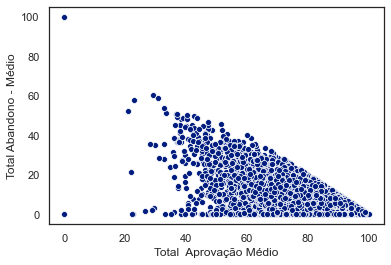

In [481]:
sns.scatterplot(x='Total  Aprovação Médio', y='Total Abandono - Médio', data=rend_esc)

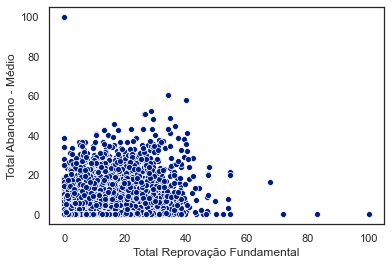

In [478]:
sns.scatterplot(x='Total Reprovação Fundamental', y='Total Abandono - Médio', data=rend_esc)

#### Histograms and kde's

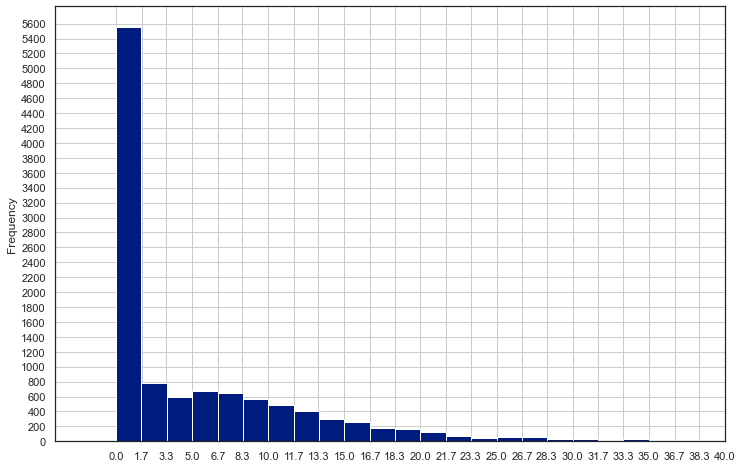

In [888]:
aband = rend_esc[totals[-1]]
aband.plot(kind='hist', bins=60, figsize=(12, 8))

plt.xticks([round(i,1) for i in np.linspace(aband.max(), aband.min(), 61)])
plt.yticks(np.arange(0, 5601, 200))
plt.xlim(-4, 40)
plt.grid()

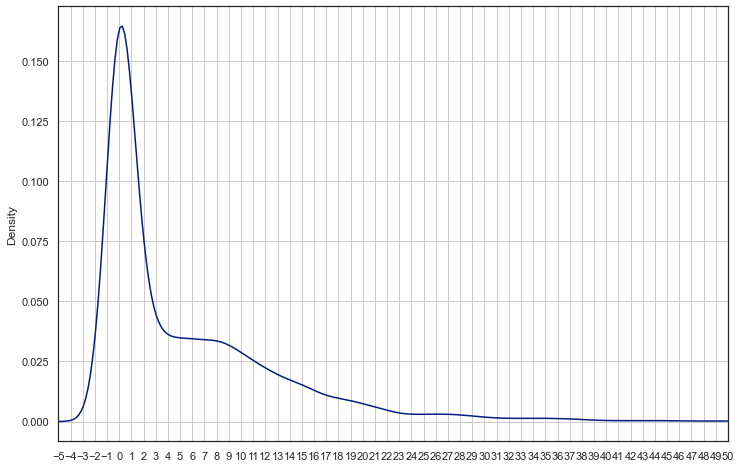

In [883]:
aband.plot(kind='kde', xlim=(-5,50), figsize=(12, 8))
plt.xticks(np.arange(-5, 51, 1))
plt.grid()

#### Possible threshholds for target 'Total Abandonment' are:
1. low < 0.4  
2. 0.44 < medium < 0.21
3. high > 0.21

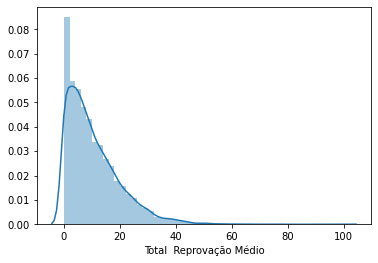

In [361]:
reprov = rend_esc[totals[3]]
sns.distplot(reprov)

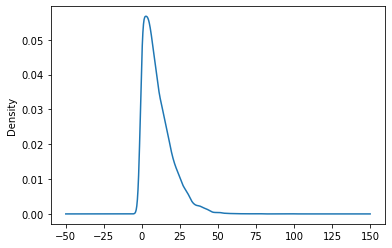

In [363]:
reprov.plot(kind='kde')

### Totals Variables

#### Multiple Histograms

In [ ]:
sns.set_context('notebook')

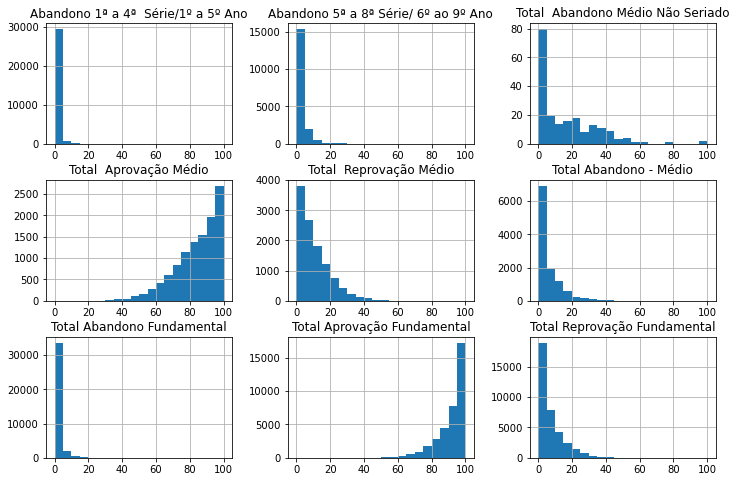

In [397]:
ax = rend_esc[totals].hist(bins=20, figsize=(12, 8))

#### Histograms Overlayed

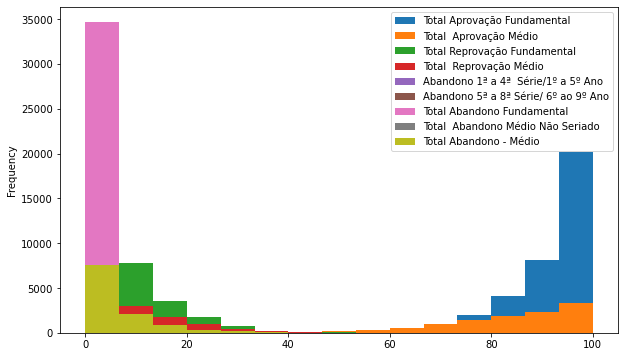

In [388]:
ax = rend_esc[totals].plot.hist(bins=15, figsize=(10, 6))

#### Box Plots

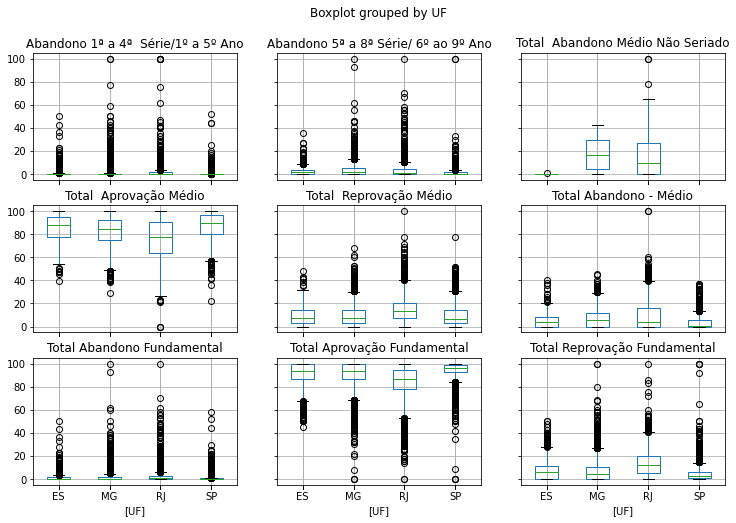

In [405]:
rend_esc[totals+[IDs[1]]].boxplot(by=IDs[1], figsize=(12,8))
plt.show()

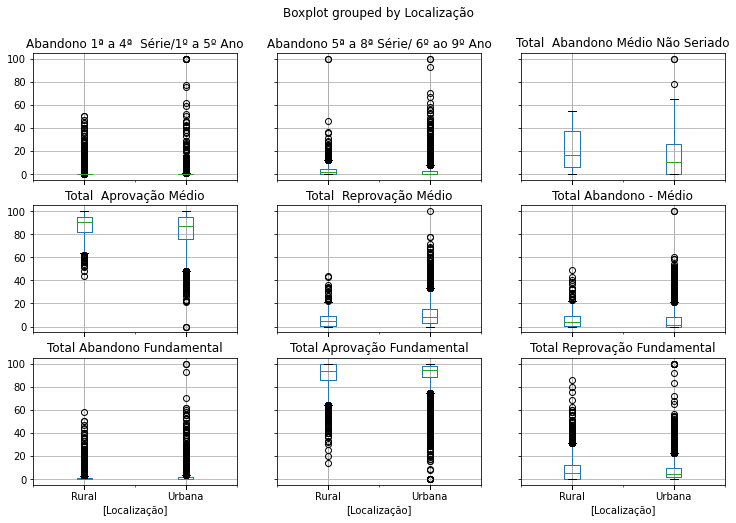

In [407]:
rend_esc[totals+[IDs[3]]].boxplot(by=IDs[3], figsize=(12,8))
plt.show()

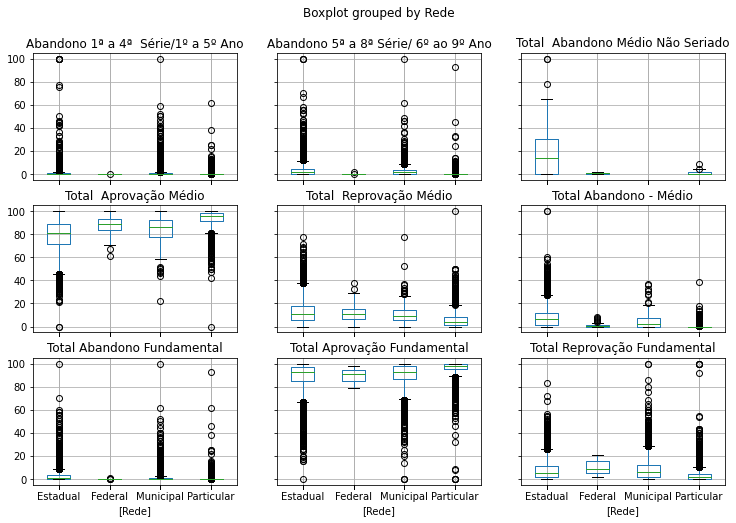

In [408]:
rend_esc[totals+[IDs[4]]].boxplot(by=IDs[4], figsize=(12,8))
plt.show()

In [439]:
sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

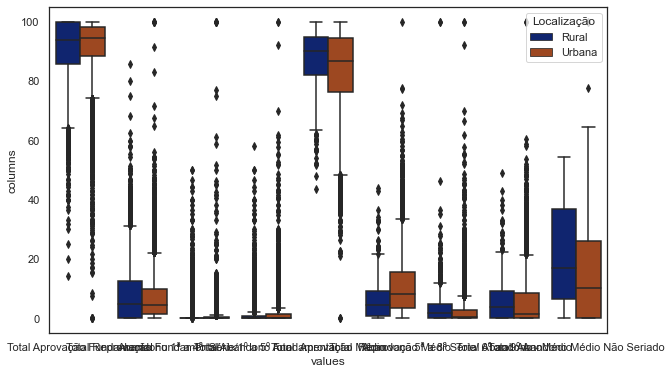

In [440]:
plot_data = rend_esc[totals+[IDs[3]]].set_index(IDs[3]).stack().to_frame().reset_index().rename(columns={0: 'columns', 'level_1': 'values'})

fig = plt.figure(figsize=(10,6))
ax0 = fig.add_subplot()
sns.boxplot(x='values', y='columns', data=plot_data, hue=IDs[3], ax=ax0)
#ax.figsize(12,8)
plt.show()

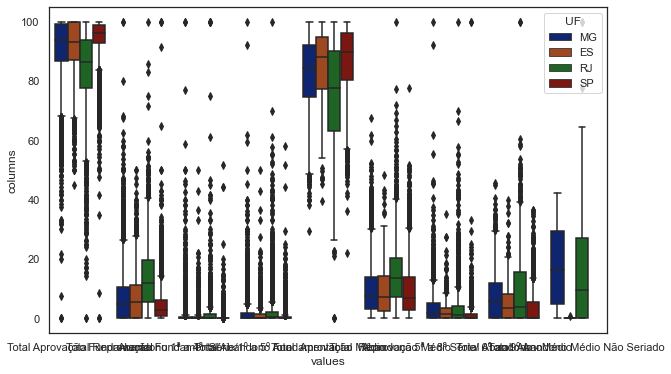

In [441]:
plot_data = rend_esc[totals+[IDs[1]]].set_index(IDs[1]).stack().to_frame().reset_index().rename(columns={0: 'columns', 'level_1': 'values'})

fig = plt.figure(figsize=(10,6))
ax0 = fig.add_subplot()
sns.boxplot(x='values', y='columns', data=plot_data, hue=IDs[1], ax=ax0)
#ax.figsize(12,8)
plt.show()

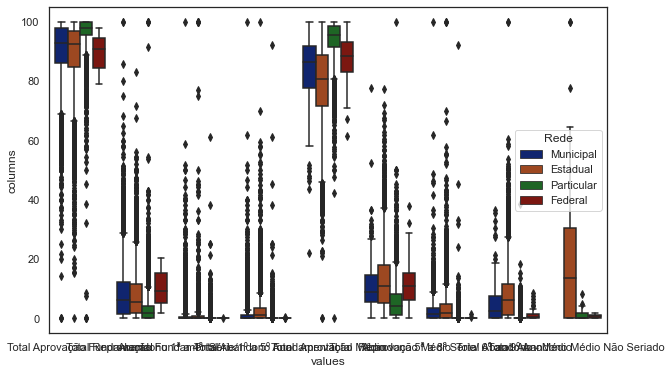

In [442]:
plot_data = rend_esc[totals+[IDs[4]]].set_index(IDs[4]).stack().to_frame().reset_index().rename(columns={0: 'columns', 'level_1': 'values'})

fig = plt.figure(figsize=(10,6))
ax0 = fig.add_subplot()
sns.boxplot(x='values', y='columns', data=plot_data, hue=IDs[4], ax=ax0)
#ax.figsize(12,8)
plt.show()

#### Pair Plot

C:\Users\luisr\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\luisr\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\luisr\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\luisr\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\luisr\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


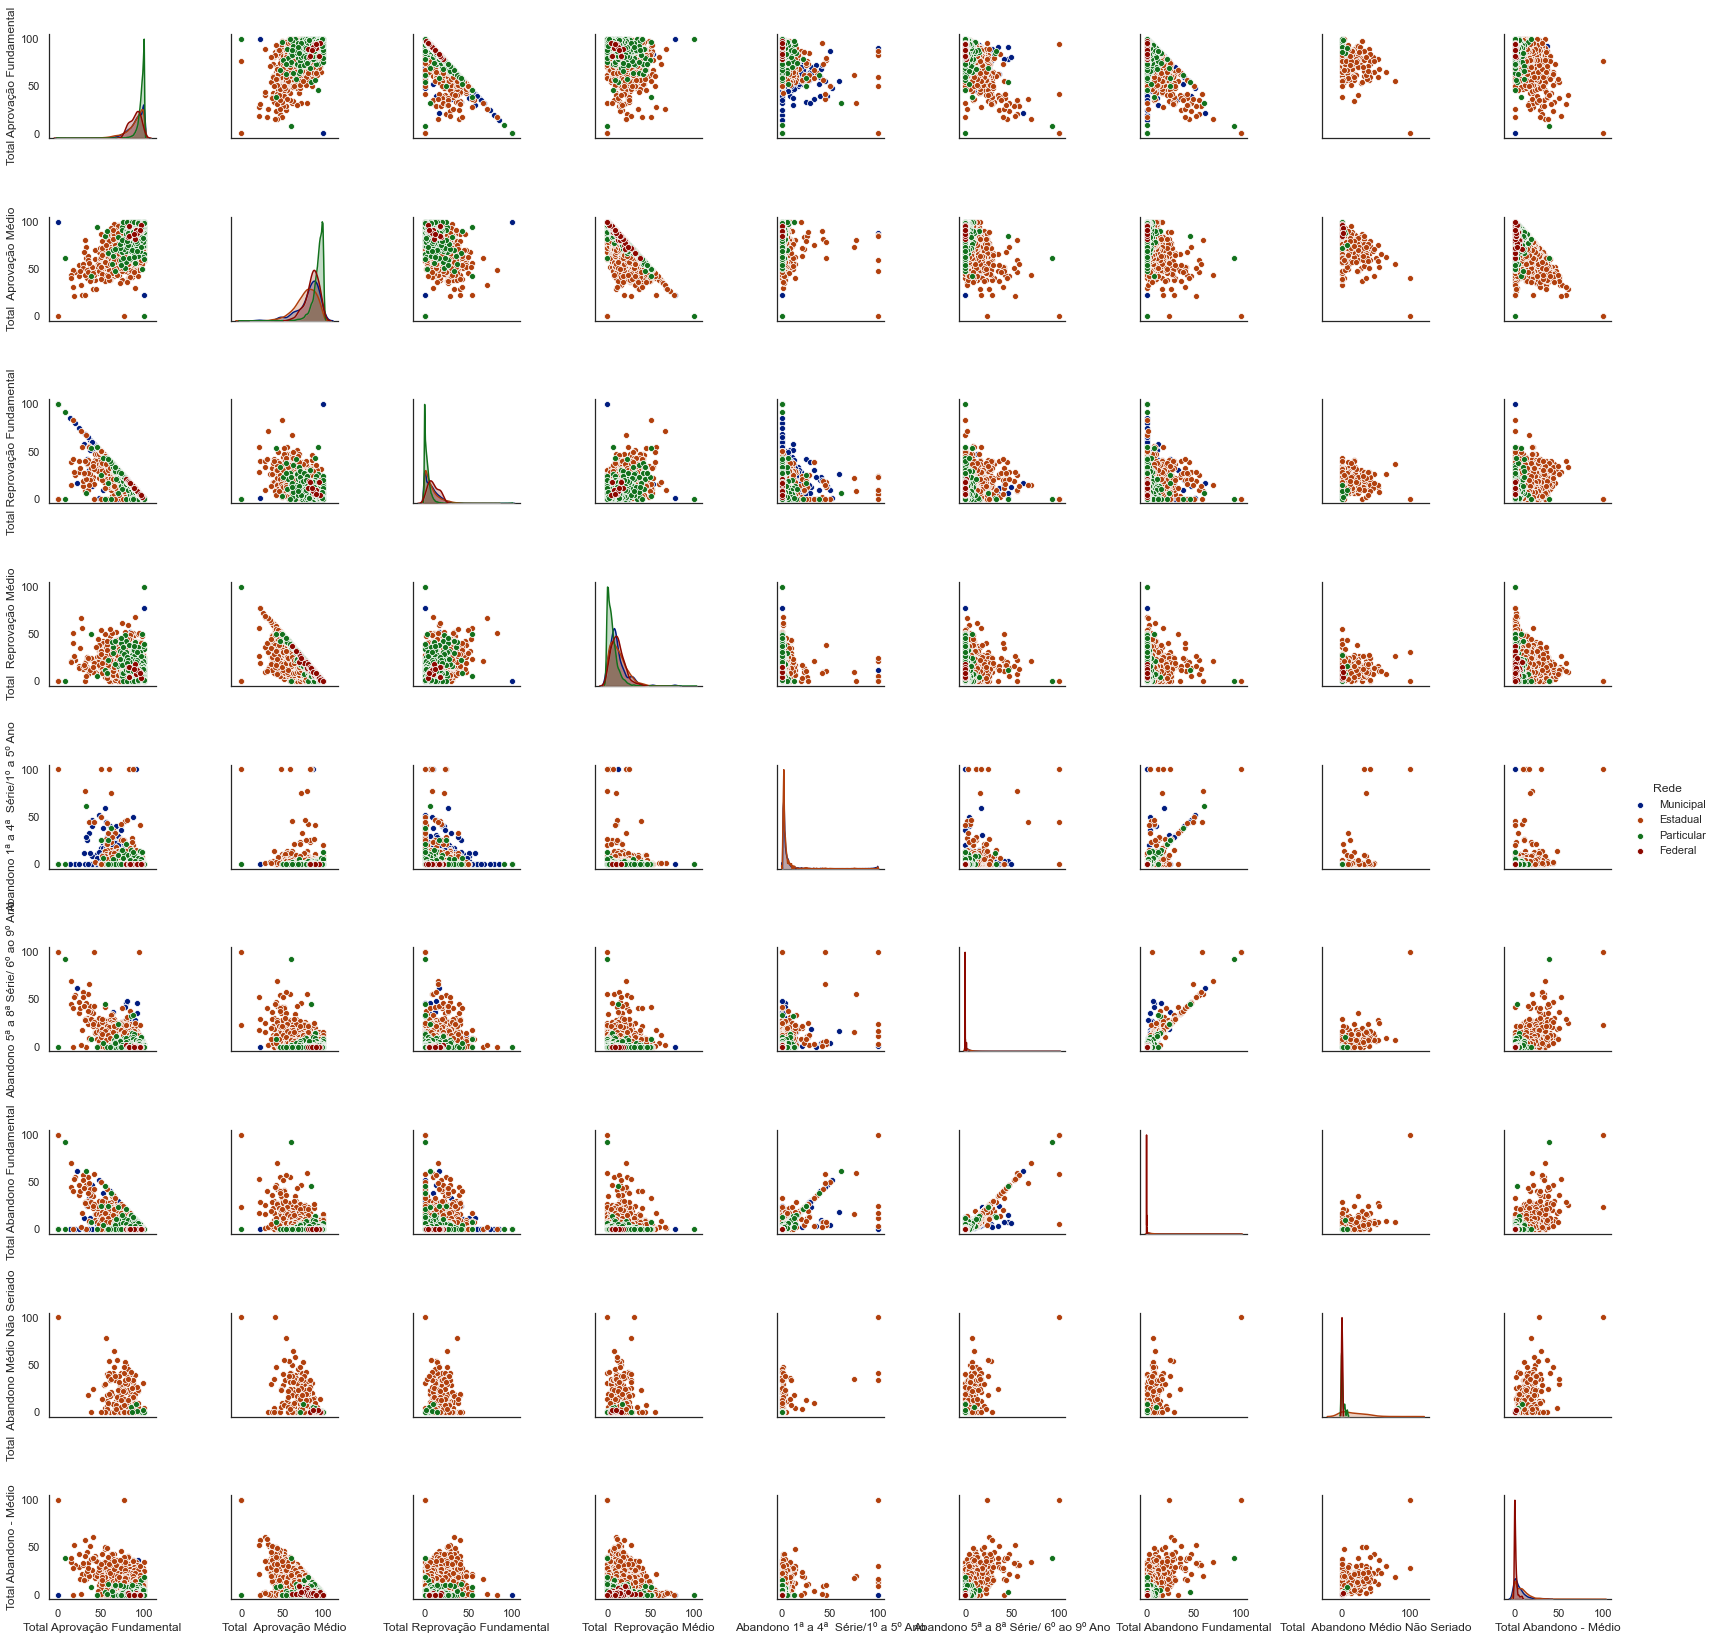

In [445]:
sns.pairplot(rend_esc[totals+[IDs[4]]], hue=IDs[4])

# 4. Feature Engineering

## 4.1 Label encoding target variable

### Arbitrary threshholds for target are:
1. low < 4  
2. 4 < medium < 21
3. high > 21

In [1090]:
def trg_as_ctgr(serie, trg_txt = 'Abandono na 1ª série - Médio'):
    
    serie_ctgr = []
    for i in serie:
        if i==np.nan:
            serie_ctgr.append(i)
            continue
        elif i<=3: serie_ctgr.append('low')
        elif i<=21: serie_ctgr.append('medium')
        else:  serie_ctgr.append('high')
    
    return serie_ctgr

In [1076]:
len(trg_as_ctgr(rend_esc[trg_txt]))==len(rend_esc[trg_txt])

True

## 4.2. Testing 'totals' columns for skewed distributions

In [672]:
skew_totals = rend_esc[totals].skew()

In [673]:
skew_totals.head(20)

Total Aprovação Fundamental             -2.050106
Total  Aprovação Médio                  -1.065587
Total Reprovação Fundamental             1.996962
Total  Reprovação Médio                  1.482172
Abandono 1ª a 4ª  Série/1º a 5º Ano     16.275835
Abandono 5ª a 8ª Série/ 6º ao 9º Ano     6.494174
Total Abandono Fundamental               8.025985
Total  Abandono Médio Não Seriado        1.574165
Total Abandono - Médio                   2.272558
dtype: float64

In [485]:
skew_limit = 0.75

In [674]:
skew_cols = (skew_totals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'skew'})
             .query('abs(skew)>{}'.format(skew_limit))
            )
skew_cols

,skew
Abandono 1ª a 4ª Série/1º a 5º Ano,16.275835
Total Abandono Fundamental,8.025985
Abandono 5ª a 8ª Série/ 6º ao 9º Ano,6.494174
Total Abandono - Médio,2.272558
Total Reprovação Fundamental,1.996962
Total Abandono Médio Não Seriado,1.574165
Total Reprovação Médio,1.482172
Total Aprovação Médio,-1.065587
Total Aprovação Fundamental,-2.050106


### Result: 
#### Every column in the total group is skewed distributed and up for log transformation.

### Conclusion:
#### This indicates that there might be other skewed variables as well, since this test was ran on the 'totals' columns which are calculated based on the sum of the other variables.

#### Lets check out.

## 4.2. Visualizing Skewed Variables with Histograms

#### The idea here is to input the correspondent column number to print its distribution before and after log transformation

Insira um número entre 10 a 62:  39


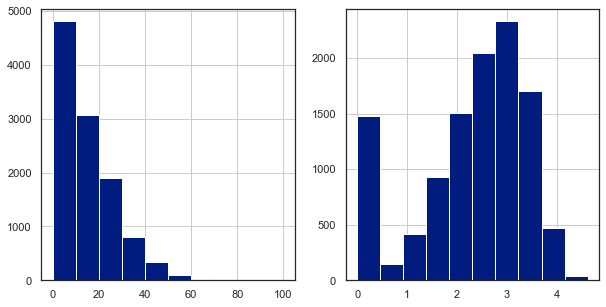

In [670]:
field = rend_esc.columns[int(input('Insira um número entre 10 a 62: '))]

fig, (ax_bfr, ax_aftr) = plt.subplots(1,2, figsize=(10,5))

rend_esc[field].hist(ax=ax_bfr)

rend_esc[field].apply(np.log1p).hist(ax=ax_aftr)

Columns were identified up or not for skewing as follows:
##### For skewing:  27 on
##### Not for skewing:  9:26

#### Note: Apperently the log transformation is only working for positively skewed variables.

#### Key-Finding2: All countinuos variables are pos or neg skewed.

## 4.3. Testing skewed 'totals' variables correlation values

In [547]:
skewed_totals = rend_esc[totals[2:]].copy()

In [548]:
for col in totals:
    skewed_totals[col] = skewed_totals[col].apply(np.log1p)

In [552]:
skewed_totals.corr().iloc[:, -1].sort_values(ascending=False)

Total Abandono - Médio                  1.000000
Abandono 5ª a 8ª Série/ 6º ao 9º Ano    0.791716
Total Abandono Fundamental              0.784094
Total  Abandono Médio Não Seriado       0.542753
Abandono 1ª a 4ª  Série/1º a 5º Ano     0.484789
Total Reprovação Fundamental            0.420430
Total  Reprovação Médio                 0.270013
Total Aprovação Fundamental            -0.451283
Total  Aprovação Médio                 -0.585838
Name: Total Abandono - Médio, dtype: float64

##### Yay, we got higher correlation values for our target :) We can go back to the correlation analysis table and see that the top two correlated variables exposed above have higher correlation values to our target than before log transformation.

#### Key-Finding 1: Fundamental level abandonment seens to be correlated to high school level abandonment in a school, specifically Fundamental 2 level (5ª a 8ª Séries). Log transformation made possible to uncover this hidden correlation.

## 4.4. Log transforming positively skewed variables

In [152]:
pstv_skewed = rend_esc.copy()

In [153]:
for col in rend_esc.columns[27:]:
    pstv_skewed[col] = pstv_skewed[col].apply(np.log1p)

### Checking for Correlation Changes

In [691]:
skewed_corr = pstv_skewed.corr()[totals[-1]].sort_values(ascending=False).to_frame().reset_index()

In [692]:
corr = rend_esc.corr()[totals[-1]].sort_values(ascending=False).to_frame().reset_index()

In [699]:
bfr_aftr_corr = (pandas
                 .merge(corr, skewed_corr, on='index')
                 .rename(columns={'Total Abandono - Médio_x': 'Before log trans',
                                  'Total Abandono - Médio_y':'After log trans'}))

In [702]:
bfr_aftr_corr[np.abs(bfr_aftr_corr['After log trans'])>0.5]

,index,Before log trans,After log trans
0,Total Abandono - Médio,1.000000,1.000000
1,Abandono na 1ª série - Médio,0.949405,0.961474
2,Abandono na 2ª série - Médio,0.919256,0.929654
3,Abandono na 3ª série - Médio,0.823489,0.863387
4,Abandono 5ª a 8ª Série/ 6º ao 9º Ano,0.682171,0.791716
5,Total Abandono Fundamental,0.661880,0.784094
6,Abandono na 8ª série/9º Ano,0.647065,0.727412
7,Abandono na 7ª série/8º Ano,0.599978,0.709561
8,Abandono na 6ª série/7º Ano,0.565006,0.648744
9,Abandono na 5ª série/6º Ano,0.544992,0.654157


### We see now a significant increase in most correlation values but the negatively correlated ones. These ones got actually decreased probably due to them being negatively skewed distributions and not having been transformed yet. Three more variables are now spotted as possible good predictors: 
1. Abandono na 3ª série - Médio
2. Abandono 5ª a 8ª Série/ 6º ao 9º Ano
3. Total Abandono Fundamental

### Correlation Heatmap after log transformation

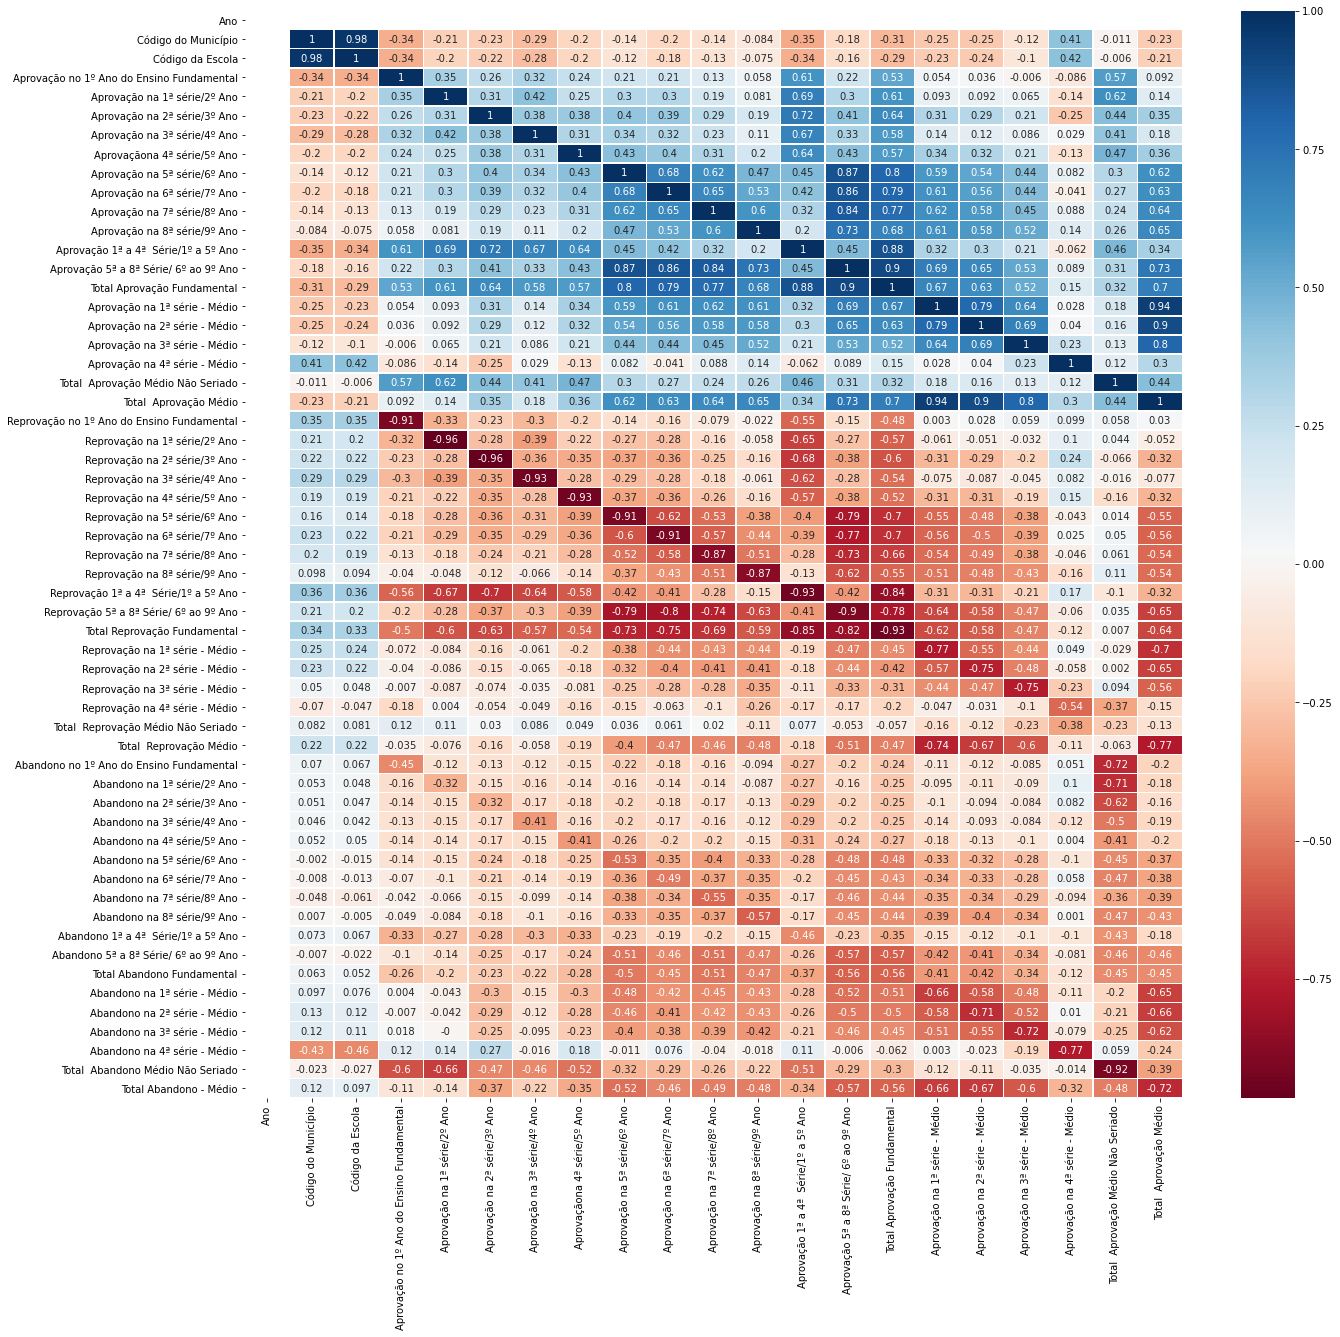

In [155]:
corr_sk = (pstv_skewed).corr()

corr_sk = round(corr, 3)

plt.figure(figsize=(21,20))

cols3_sk = int(len(corr_sk.columns)/3)+2
            
seaborn.heatmap(corr_sk.iloc[:, :cols3_sk], cmap='RdBu', xticklabels=True, annot=True, linewidths=0.5)
#plt.colorbar()
#plt.figsize=(40,12)
plt.show()

## 4.5. Log transforming including negatively skewed variables

In [703]:
all_skewed = rend_esc.copy()

In [704]:
for col in rend_esc.columns[9:]:
    all_skewed[col] = all_skewed[col].apply(np.log1p)

### Checking for Correlation Changes

In [708]:
all_skewed_corr = all_skewed.corr()[totals[-1]].sort_values(ascending=False).to_frame().reset_index()

In [711]:
all_bfr_aftr_corr = pandas.merge(bfr_aftr_corr, all_skewed_corr, on='index').rename(columns={'After log trans': 'pos log trans', 'Total Abandono - Médio': 'neg log trans'})


In [712]:
all_bfr_aftr_corr[np.abs(all_bfr_aftr_corr['pos log trans'])>0.5]

,index,Before log trans,pos log trans,neg log trans
0,Total Abandono - Médio,1.000000,1.000000,1.000000
1,Abandono na 1ª série - Médio,0.949405,0.961474,0.961474
2,Abandono na 2ª série - Médio,0.919256,0.929654,0.929654
3,Abandono na 3ª série - Médio,0.823489,0.863387,0.863387
4,Abandono 5ª a 8ª Série/ 6º ao 9º Ano,0.682171,0.791716,0.791716
5,Total Abandono Fundamental,0.661880,0.784094,0.784094
6,Abandono na 8ª série/9º Ano,0.647065,0.727412,0.727412
7,Abandono na 7ª série/8º Ano,0.599978,0.709561,0.709561
8,Abandono na 6ª série/7º Ano,0.565006,0.648744,0.648744
9,Abandono na 5ª série/6º Ano,0.544992,0.654157,0.654157


#### We now can see a decrease in the correlation values of the negatively correlated features of the target. Probably the log transformation is not being properly applied for negatively skewed features.

## 5. Addressing Missing Values

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [533]:
rend_esc.iloc[:, 9:].shape     # Only IDs columns

(38907, 54)

In [534]:
rend_esc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38907 entries, 0 to 38906
Data columns (total 63 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Ano                                         38907 non-null  int32  
 1   Região                                      38907 non-null  object 
 2   UF                                          38907 non-null  object 
 3   Código do Município                         38907 non-null  int32  
 4   Nome do Município                           38907 non-null  object 
 5   Localização                                 38907 non-null  object 
 6   Rede                                        38907 non-null  object 
 7   Código da Escola                            38907 non-null  int32  
 8   Nome da Escola                              38907 non-null  object 
 9   Aprovação no 1º Ano do Ensino Fundamental   27468 non-null  float64
 10  Aprovação 

In [135]:
row_null_cnt = rend_esc.iloc[:, 9:].T.isnull().sum()

In [732]:
row_null_cnt[:10]

0    33
1    24
2    33
3    33
4    33
5    33
6    33
7    33
8    24
9    33
dtype: int64

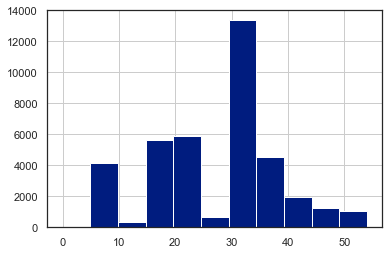

In [734]:
row_null_cnt.hist(bins=11)
plt.show()

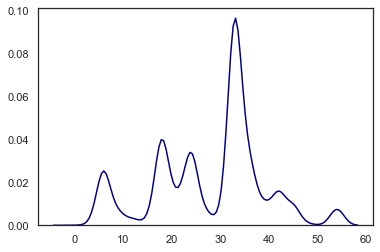

In [735]:
sns.distplot(row_null_cnt.values, bins=60, color='darkblue', hist=False)
plt.show()

We can see that a lot of lines are missing around values 30 and 36. Lets check the columns for missing values.

In [225]:
col_null_cnt = rend_esc.iloc[:, 9:].isnull().sum().to_frame().reset_index()

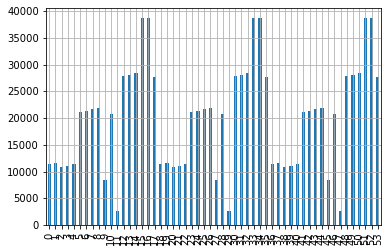

In [235]:
col_null_cnt[0].plot(kind='bar')

plt.grid()
plt.show()

In [ ]:
There are 5 main ranges for the missing values quantities on each columns. From a total of 38907 columns 5 main ranges of missing values are: 
1. More than 35000
2. Between 25000 and 30000
3. Between 20000 and 25000
4. Between 10000 and 15000
5. Less than 10000

Its evident that values are missing sistematicly. There are three repetitions of a pattern conneceted to the basic education subivision in 3 modules. Modules are Fundamentals 1 and 2 and High school. Apperently The lack of information increases with the module by approximaly 90%.

This bar chart highlights that there's more information missing on high school years than on basic education columns.

In [467]:
cnts=col_null_cnt[0]

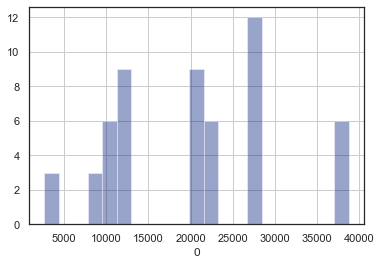

In [740]:
fig = plt.figure(figsize=(6, 4))
ax0=fig.add_subplot()
sns.distplot(col_null_cnt[0], kde=False, hist=True, bins=21, ax=ax0)

plt.grid()
plt.show()

#### Here it's easier to see the five mentioned ranges of missing values quantities per column. Columns missing arround 10000 and around 21000 are the most present in quantity.

We can see that there are four groups with the same height. This indicates the values are missing sistematically.

### Parameter Definition: 'Q' missing values between 0 and 54 in rows. Enter Q value to sample schools with specific number of missing features higher or above Q.

In [1121]:
Q = list(range(54))

In [1125]:
smp_index = row_null_cnt[row_null_cnt<11].index

In [1126]:
sample = rend_esc.iloc[:, 9:].loc[smp_index]

In [1127]:
len(sample)

4202

#### Check missing percentage in sample.

In [833]:
miss_prc = rend_esc.isnull().sum().sum()/(rend_esc.shape[0]*rend_esc.shape[1])
miss_prc_smp = sample.isnull().sum().sum()/(sample.shape[0]*sample.shape[1])
print('Missing values in sample: {}\r\nMissing values in entire dataset: {}'.format(round(miss_prc_smp,4), round(miss_prc,4)))



Percentage of missing values in sample: 0.12
Missing values in total Dataset: 0.4448


### 5.n Replacing missing values by the mean in log transformed variables.

In [841]:
skewed = pstv_skewed.iloc[:, 9:]

In [823]:
for col in skewed.columns:
    skewed[col] = skewed[col].fillna(np.mean(skewed[col]))

In [824]:
skewed.isnull().sum().sum()

0

## Sampling at Q equals 11 missing values maximum per row.

In [1175]:
smp_index = row_null_cnt[row_null_cnt<11].index

In [1176]:
sample = pstv_skewed.iloc[:, 9:].loc[smp_index].reset_index(drop=True)

In [1177]:
sample.isnull().sum().sum(), len(sample)

(27228, 4202)

# Feature Selection

In [1272]:
rend_esc.columns

Index(['Unnamed: 0', 'Ano', 'Região', 'UF', 'Código do Município',
       'Nome do Município', 'Localização', 'Rede', 'Código da Escola',
       'Nome da Escola', 'Aprovação no 1º Ano do Ensino Fundamental',
       'Aprovação na 1ª série/2º Ano', 'Aprovação na 2ª série/3º Ano',
       'Aprovação na 3ª série/4º Ano', 'Aprovaçãona 4ª série/5º Ano',
       'Aprovação na 5ª série/6º Ano', 'Aprovação na 6ª série/7º Ano',
       'Aprovação na 7ª série/8º Ano', 'Aprovação na 8ª série/9º Ano',
       'Aprovação 1ª a 4ª  Série/1º a 5º Ano',
       'Aprovação 5ª a 8ª Série/ 6º ao 9º Ano', 'Total Aprovação Fundamental',
       'Aprovação na 1ª série - Médio', 'Aprovação na 2ª série - Médio',
       'Aprovação na 3ª série - Médio', 'Aprovação na 4ª série - Médio',
       'Total  Aprovação Médio Não Seriado', 'Total  Aprovação Médio',
       'Reprovação no 1º Ano do Ensino Fundamental',
       'Reprovação na 1ª série/2º Ano', 'Reprovação na 2ª série/3º Ano',
       'Reprovação na 3ª série/4º Ano', 

In [1178]:
for col in sample.columns:
    sample[col] = sample[col].fillna(np.mean(pstv_skewed[col]))

In [1180]:
y_trg_ctgr = trg_as_ctgr(rend_esc[trg_txt].fillna(np.mean(rend_esc[trg_txt])).loc[smp_index])


In [1181]:
x = sample.drop(trg_txt, axis=1)

In [1195]:
pandas.Series(y_trg_ctgr).value_counts()

low       2992
medium    1010
high       200
dtype: int64

In [1197]:
y = np.array(y_trg_ctgr)

## Splitting Features

In [1198]:
msk = np.random.rand(len(y))<0.8
x_train, y_train, x_test, y_test = x[msk], y[msk], x[~msk], y[~msk]

## Building Model

In [857]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr_obj = LinearRegression().fit(x_train, y_train)

In [1200]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

from sklearn.linear_model import LogisticRegression

from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler

In [1202]:
x_train_norm = StandardScaler().fit(x_train).transform(x_train)
x_test_norm = StandardScaler().fit(x_test).transform(x_test)

In [1264]:
tree_obj = DecisionTreeClassifier(criterion='entropy', max_depth = 9).fit(x_train_norm, y_train)    # NAN Issue
ypred_tree = tree_obj.predict(x_test_norm)

In [1204]:
ypred_knn = KNeighborsClassifier(n_neighbors=40).fit(x_train_norm, y_train).predict(x_test_norm)

# Classification

###  Pre-requisites for KNN Classification: 
1. binary categories: 0 and 1
2. ordinal categories: 0 on.
3. integers like age: normal
4. continuous: normal

In [1205]:
ypred_log = LogisticRegression(C=0.01, solver='liblinear').fit(x_train_norm, y_train).predict(x_test_norm)

In [1210]:
ypred_svc = svm.SVC(kernel='rbf').fit(x_train, y_train).predict(x_test)

In [1208]:
from sklearn.metrics import accuracy_score as acc_scr, confusion_matrix, classification_report

In [1265]:
tree_scr = acc_scr(y_test, ypred_tree)

In [1212]:
knn_scr = acc_scr(y_test, ypred_knn)

In [1213]:
log_scr = acc_scr(y_test, ypred_log)

In [1214]:
svc_scr = acc_scr(y_test, ypred_svc)

In [1266]:

tree_scr, knn_scr, log_scr, svc_scr

(0.9625292740046838,
 0.8653395784543325,
 0.8899297423887588,
 0.7857142857142857)

In [1258]:
confusion_matrix(y_test, ypred_tree, labels=['low', 'medium', 'high'])

array([[591,   9,   0],
       [ 15, 193,   1],
       [  0,   8,  37]], dtype=int64)

In [1260]:
32/len(y_test)

0.03747072599531616

1 degrees appended.


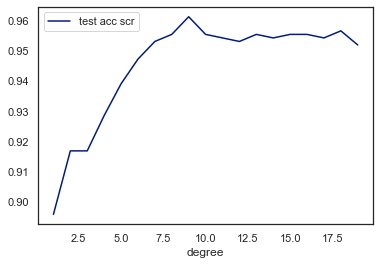

In [1250]:
scrs = []

for i in range(1, 20):
    y_pred_tst = DecisionTreeClassifier(criterion='entropy', max_depth=i).fit(x_train_norm, y_train).predict(x_test_norm)
    scrs.append([i, acc_scr(y_test, y_pred_tst)])
    if i in range(1,501,25): print('{} degrees appended.'.format(i))

scrs_df = pd.DataFrame(scrs, columns=['degree', 'test acc scr'])

scrs_df.plot(x='degree', y='test acc scr')

In [1251]:
scrs_df.sort_values(by='test acc scr', ascending=False)[:10]

,degree,test acc scr
8,9,0.961358
17,18,0.956674
9,10,0.955504
12,13,0.955504
15,16,0.955504
14,15,0.955504
7,8,0.955504
16,17,0.954333
13,14,0.954333
10,11,0.954333


Tree Model Optimized !!! Optimal max_depth equals 9, maximum accuracy score reached: 0.9673, maximum error proportion 0.03747 =D.

### Saving and Retreiving Decision Tree

In [1267]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 
import matplotlib.pyplot as plt

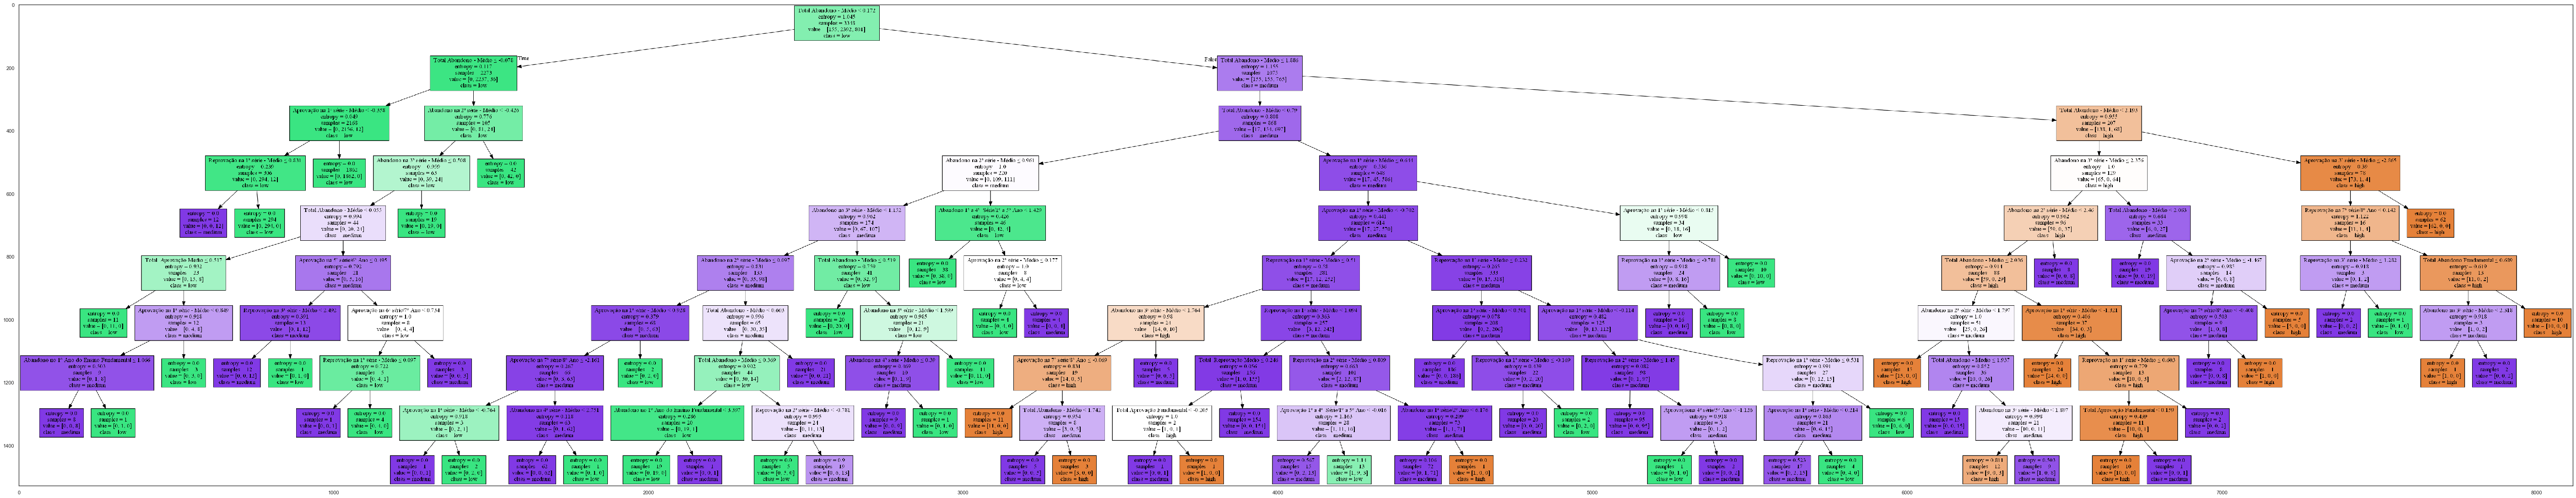

In [1268]:
dot_data = StringIO()
filename = "abandonment_tree.png"
featureNames = x.columns.values
targetNames = np.unique(y).astype(str)
out=tree.export_graphviz(tree_obj, feature_names=featureNames, out_file=dot_data, class_names=targetNames, filled=True, special_characters=True, rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [1269]:
trg_txt

'Abandono na 1ª série - Médio'